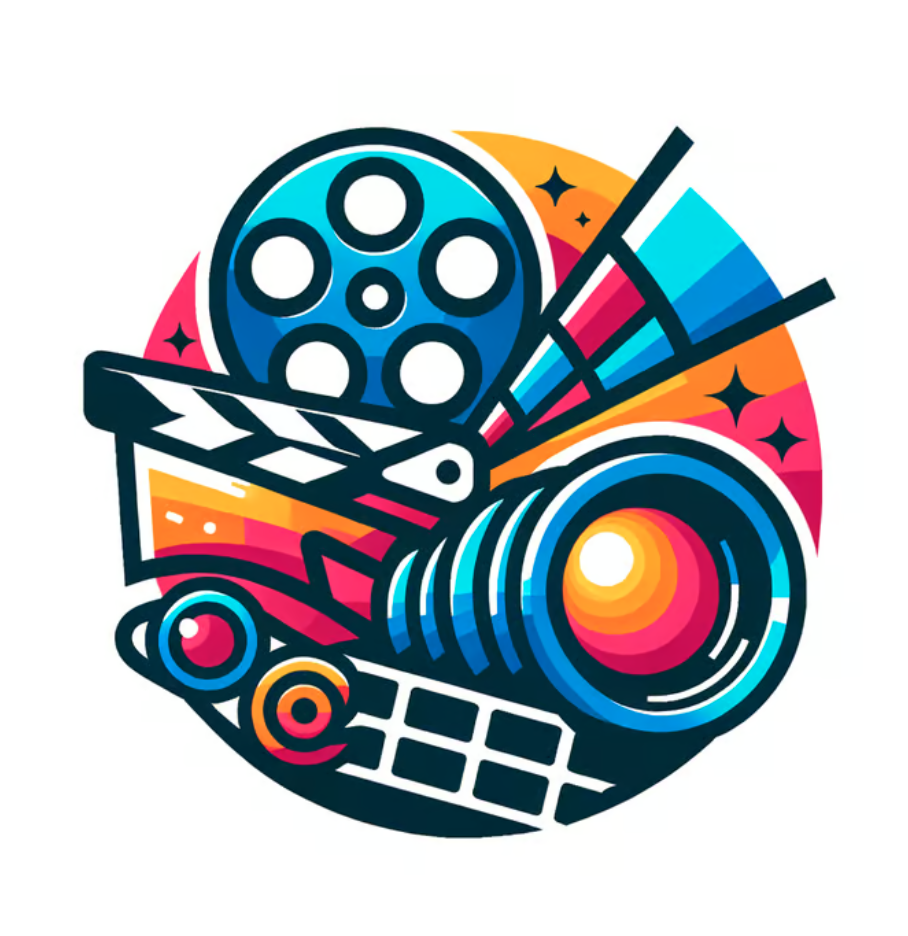

# MOVIE ANALYSIS FOR MICROSOFT CORPORATION


## Final Project Submission 

* Student name: Evaclaire Munyika
* Student pace: Full time - Remote
* Scheduled project review date/time: 22nd March, 2024
* Instructor name: Asha Deen / Lucille Kaleha
* Blog post URL:


## Overview

This project was aimed at helping Microsoft break into the movie industry by obtaining much needed insight into what makes for a great movie. I looked into a wide variety of films produced over the years to see what makes some perform better than others.

## Business Understanding

Microsoft is a multinational technology company headquatered in Redmond, Washington,USA. They are well known for their software products and services and are now looking to dive into the movie making scene and compete against industry heavy hitters. Microsoft decided to create a new movie studio but they lacked proper insight as to what makes great movies,GREAT! The goal was to analyse some of the most successful box office movies and advice the head of Microsoft's new movie studio on what they need inorder to produce successful films. The following are some factors that I considered for my analysis: 

* Movie genre


## Data Understanding

The following were my sources of data for this project:

* ImDb movie database - This is an SQLite database that contained two tables relevant to our analysis. The first table is the movie basic table that contains movie id, original and primary movie title, start year, genre, runtime in minutes. The second table is called movie rating and it contains the movie id, average rating and number of votes a movie garnered.

* Box office mojo (BOM) - This dataset contains the movie name, domestic and foreign gross, year and the studio that produced the movie.

* 

## Data Preparation

I began by importing the modules I would require for the entirety of this project.

In [2]:
# importing the necessary modules to carry out the project
import pandas as pd
# configuring pandas to display floating point numbers 
# to 2 decimal places
pd.options.display.float_format = '{:.2f}'.format
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### International Movie Database (ImDB) data

I began by assessing the data contained in the movie basics table in the imdb database using SQLite3.

In [3]:
# declaring the path to the database
database_path = r'/Users/claire/Desktop/DS-FT08/Project files/im.db'
# connecting to the database
conn = sqlite3.connect(database_path)
# querying the database to view the movie basics table
q = '''
SELECT *
FROM movie_basics;
'''
movie_basics_df = pd.read_sql(q, conn)
# closing the database connection
conn.close()
# previewing the dataframe
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"


In [4]:
# assessing information about the dataframe 
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


I could see I had some missing values in the original_title column, the start_year column, runtime_minutes and genres column. My major focus was on the genres, runtime minutes and start year column so I went ahead to see what they contained.

In [5]:
# assessing the value counts of the top 20 genres
movie_basics_df['genres'].value_counts().head(20)

Documentary                      32185
Drama                            21486
Comedy                            9177
Horror                            4372
Comedy,Drama                      3519
Thriller                          3046
Action                            2219
Biography,Documentary             2115
Drama,Romance                     2079
Comedy,Drama,Romance              1558
Documentary,Drama                 1554
Comedy,Romance                    1507
Romance                           1454
Documentary,Music                 1365
Drama,Thriller                    1335
Documentary,History               1289
Horror,Thriller                   1253
Biography,Documentary,History     1230
Biography,Documentary,Drama       1028
Family                             939
Name: genres, dtype: int64

In [6]:
# getting descriptive statistics of the runtime minutes column
movie_basics_df['runtime_minutes'].describe()

count   114405.00
mean        86.19
std        166.36
min          1.00
25%         70.00
50%         87.00
75%         99.00
max      51420.00
Name: runtime_minutes, dtype: float64

In [7]:
movie_basics_df['start_year'].value_counts()

2017    17504
2016    17272
2018    16849
2015    16243
2014    15589
2013    14709
2012    13787
2011    12900
2010    11849
2019     8379
2020      937
2021       83
2022       32
2023        5
2024        2
2027        1
2026        1
2025        1
2115        1
Name: start_year, dtype: int64

Now to view the contents of the movie ratings dataframe.

In [8]:
# declaring the path to the database
database_path = r'/Users/claire/Desktop/DS-FT08/Project files/im.db'
# connecting to the database
conn = sqlite3.connect(database_path)
# querying the database to view the movie ratings table
q = '''
SELECT *
FROM movie_ratings;
'''
movie_ratings_df = pd.read_sql(q, conn)
# closing the database connection
conn.close()
# previewing the dataframe
movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.30,31
1,tt10384606,8.90,559
2,tt1042974,6.40,20
3,tt1043726,4.20,50352
4,tt1060240,6.50,21


In [9]:
# assessing information about the dataframe
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


Luckily there were no missing values so I went on to get descriptive statistics of the average rating column and the numvotes column to get a feel of the data.

In [10]:
# getting descriptive statistics of average movie ratings
movie_ratings_df['averagerating'].describe()

count   73856.00
mean        6.33
std         1.47
min         1.00
25%         5.50
50%         6.50
75%         7.40
max        10.00
Name: averagerating, dtype: float64

In [11]:
# getting descriptive statistics of numvotes
movie_ratings_df['numvotes'].describe()

count     73856.00
mean       3523.66
std       30294.02
min           5.00
25%          14.00
50%          49.00
75%         282.00
max     1841066.00
Name: numvotes, dtype: float64

I saw that the numvotes column contained some outliers which I would have to deal with along the way. At this point I thought it best to merge the two tables from the imdb database in order to assign the average ratings to specific movies.


In [12]:
imdb_merged_df = pd.merge(movie_basics_df, movie_ratings_df, how = 'outer')
imdb_merged_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama",7.00,77.00
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama",7.20,43.00
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama,6.90,4517.00
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama",6.10,13.00
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy",6.50,119.00


In [24]:
imdb_merged_df['start_year'].value_counts()

2017    17504
2016    17272
2018    16849
2015    16243
2014    15589
2013    14709
2012    13787
2011    12900
2010    11849
2019     8379
2020      937
2021       83
2022       32
2023        5
2024        2
2027        1
2026        1
2025        1
2115        1
Name: start_year, dtype: int64

### Box Office Mojo Data

I decided to look into the Box Office Mojo (bom) movie gross file to see what additional data I would gain.

In [13]:
# declaring the file path
file_path = r'/Users/claire/Desktop/DS-FT08/Project files/bom.movie_gross.csv'
# reading the csv file into a dataframe
bom_movie_gross_df = pd.read_csv(file_path)
# displaying first five results
bom_movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
3,Inception,WB,292600000.00,535700000,2010
4,Shrek Forever After,P/DW,238700000.00,513900000,2010


In [14]:
# getting information about the dataframe
bom_movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [15]:
# getting descriptive statistics of the domestic gross column
bom_movie_gross_df['domestic_gross'].describe()

count        3359.00
mean     28745845.07
std      66982498.24
min           100.00
25%        120000.00
50%       1400000.00
75%      27900000.00
max     936700000.00
Name: domestic_gross, dtype: float64

In [16]:
# getting descriptive statistics of the foreign gross column
bom_movie_gross_df['foreign_gross'].describe()

count        2037
unique       1204
top       1200000
freq           23
Name: foreign_gross, dtype: object

Upon realizing that data in the foreign gross column was of the type object, I got to changing its format to float64 after stripping any unneccesary commas present in some of the values.

In [17]:
# converting data type from object to float64
bom_movie_gross_df['foreign_gross'] = bom_movie_gross_df['foreign_gross'].str.replace(',', '').astype(float)

In [18]:
# confirming data type has changed to float64
bom_movie_gross_df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

In [19]:
bom_movie_gross_df['foreign_gross'].describe()

count        2037.00
mean     74872810.15
std     137410600.84
min           600.00
25%       3700000.00
50%      18700000.00
75%      74900000.00
max     960500000.00
Name: foreign_gross, dtype: float64

In [20]:
# declaring the file path
file_path = r'/Users/claire/Desktop/DS-FT08/Project files/tmdb.movies.csv'
# reading the csv file into a dataframe
tmdb_df = pd.read_csv(file_path)
# displaying first five results
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186


In [21]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [22]:
# declaring the file path
file_path = r'/Users/claire/Desktop/DS-FT08/Project files/tn.movie_budgets.csv'
# reading the csv file into a dataframe
movie_budgets_df = pd.read_csv(file_path)
# displaying first five results
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [23]:
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
